# **Práctica 9: Árboles. Parte 2.**

## **Nodos y Árbol**

In [ ]:
import matplotlib.pyplot as plt
import random
import string

class Data:
    def __init__(self, key, value):
        self.key = key
        self.value = value
    def __str__(self):
        return str(self.key) + "->" + self.value

class BTreeNode:
    
    def __init__(self, t, leaf):
        self.t = t
        self.leaf = leaf
        self.keys = [None] * (2 * self.t - 1)
        self.C = [None] * (2 * self.t)
        self.n = 0

    def insertNonFull(self, data, time, space):                 # Temporal                  # Espacial
        time += 1
        space += 1
        i = self.n - 1                                          # log_t(n)*6                # log_t(n)*2
        if self.leaf:                                           # log_t(n)*3                # log_t(n)*1
            while i >= 0 and self.keys[i].key > data.key:       # log_t(n)*13(2t-1)         # log_t(n)*1
                time += 1
                self.keys[i + 1] = self.keys[i]                 # log_t(n)*9(2t-1)          # log_t(n)*2
                i -= 1                                          # log_t(n)*5(2t-1)          # log_t(n)*2
            self.keys[i + 1] = data                             # log_t(n)*7                # log_t(n)*2
            self.n += 1                                         # log_t(n)*6                # log_t(n)*2
        else:                                                   # log_t(n)*1
            while i >= 0 and self.keys[i].key > data.key:       # log_t(n)*13(2t-1)         # log_t(n)*1
                time += 1
                i -= 1                                          # log_t(n)*5(2t-1)          # log_t(n)*2
            if self.C[i + 1].n == 2 * self.t - 1:               # log_t(n)*14               # log_t(n)*1
                ts, ss = self.splitChild(i + 1, self.C[i + 1])  # log_t(n)*(9+(93t-6))      # log_t(n)*(17t+3)
                time += ts
                space += ss
                if self.keys[i + 1].key < data.key:             # log_t(n)*10               # log_t(n)*1
                    i += 1                                      # log_t(n)*5                # log_t(n)*2
            time, space = self.C[i + 1].insertNonFull(data, time, space)     # log_t(n)*7log_t(n)        # log_t(n)*log_t(n)
        return time, space
        # Caso Pero/Promedio/Mejor                              = 93t*log_t(n)+7*[log_t(b)]^2+85*log_t(n)-6
        #                                                                                   # 17t*log_t(n)+22log_t(n)+(log_t(n))^2

    def splitChild(self, i, y):                                 # Temporal      # Espacial
        time, space = 0, 0
        z = BTreeNode(y.t, y.leaf)                              # 6+(2t-1)      # 1+(2t)
        time += 1
        space += 1
        z.n = self.t - 1                                        # 7             # 2
        for j in range(self.t - 1):                             # 8(t-1)        # 1(t-1)
            time += 1
            z.keys[j] = y.keys[j + self.t]                      # 10(t-1)       # 2(t-1)
        if not y.leaf:                                          # 4             # 1
            for j in range(self.t):                             # 8t            # 1(t)
                time += 1
                z.C[j] = y.C[j + self.t]                        # 10t           # 2(t)
        y.n = self.t - 1                                        # 8             # 2
        for j in range(self.n, i, -1):                          # 8(2t-2)       # 1(2t-2)
            time += 1
            self.C[j + 1] = self.C[j]                           # 9(2t-2)       # 2(2t-2)
        self.C[i + 1] = z                                       # 7             # 2
        for j in range(self.n - 1, i - 1, -1):                  # 12t           # 1t
            time += 1
            self.keys[j + 1] = self.keys[j]                     # 9t            # 2t
        self.keys[i] = y.keys[self.t - 1]                       # 10            # 2
        self.n += 1                                             # 5             # 2
        return time, space
        # Peor Caso                                             = 93t-6         = 17t+3
        # Caso Promedio                                         = 78t-8         = 15t+3
        # Mejor Caso                                            = 69t-11        = 12t+4

    def traverse(self, l, time, space):                                 # Temporal          # Espacial
        space = max(space, l)
        for i in range(self.n):                                         # 9n                # 1
            time += 1
            if not self.leaf:                                           # 4n                # 1
                time, space = self.C[i].traverse(l + 1, time, space)    # 7n+n              # 1log_t(n)
            # print("\t" * l, l, self.keys[i], end=' ')                 # 8n
        # print()                                                       # 1
        if not self.leaf:                                               # 4                 # 1
            time, space = self.C[self.n].traverse(l + 1, time, space)   # 8n                # 1log_t(n)
        return time, space
        # Caso Peor/Promedio/Mejor:                                     = 37n+5             = 2log_t(n)+3
    
    def search(self, k, time, space):                           # Temporal                  # Espacial
        time += 1
        space += 1
        i = 0                                                   # log_t(n)*3                # log_t(n)*2
        while i < self.n and k > self.keys[i].key:              # log_t(n)*12(2t-1)         # log_t(n)*1
            time += 1
            i += 1                                              # log_t(n)*5(2t-1)          # log_t(n)*2
        if i < self.n and k == self.keys[i].key:                # log_t(n)*11               # log_t(n)*1
            return self, time, space                            # log_t(n)*2
        if self.leaf:                                           # log_t(n)*3                # log_t(n)*1
            return None, time, space                            # log_t(n)*2
        return self.C[i].search(k, time, space)                 # log_t(n)*(6+log_t(n))     # log_t(n)
        # Peor Caso                                             = 34tlog_t(n)+10log_t(n)+(log_t(n))^2
        #                                                                                   = 8log_t(n)
        # Mejor Caso                                            = 34t                       = 6
        # Caso Promedio                                         = 17tlog_t(n)+5log_t(n)+(log_t(n))^2
        #                                                                                   = 4log_t(n)

class BTree:
    
    def __init__(self, t):
        self.root = None
        self.t = t
    
    def traverse(self):
        if self.root != None:
            time, space = self.root.traverse(0, 0, 0)
            return time, space
        return 0, 0
    
    def search(self, k):
        if self.root is None:
            return None, 0, 0
        else:
            result, time, space = self.root.search(k, 0, 0)
        return result, time, space
    
    def insert(self, data):
        time, space, t_split, s_split = 1, 1, 1, 1
        if self.root == None:
            self.root = BTreeNode(self.t, True)
            self.root.keys[0] = data
            self.root.n = 1
        else:
            if self.root.n == 2 * self.t - 1:
                s = BTreeNode(self.t, False)
                s.C[0] = self.root
                t_split, s_split = s.splitChild(0, self.root)
                i = 0
                if s.keys[0].key < data.key:
                    i += 1
                time, space = s.C[i].insertNonFull(data, 0, 0)
                self.root = s
            else:
                time, space = self.root.insertNonFull(data, 0, 0)
        return time, space, t_split, s_split


## **Prueba**

In [21]:
LENGTH_STR = 5
D = 2

values = [10, 27, 29, 17, 25, 21, 15, 31, 13, 51, 20, 24, 48, 19, 60, 35, 66]

def randstring(length):
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

if __name__ == "__main__":
    t = BTree(D)

    for value in values:
        time, space, t_split, s_split = t.insert(Data(value, randstring(LENGTH_STR)))
    
    time, space = t.traverse()
    print()

    k = 6
    result, time, space = t.search(k)
    
    if result != None:
        print("Found")
    else:
        print("Not Found")


Not Found


## **Peores Casos**

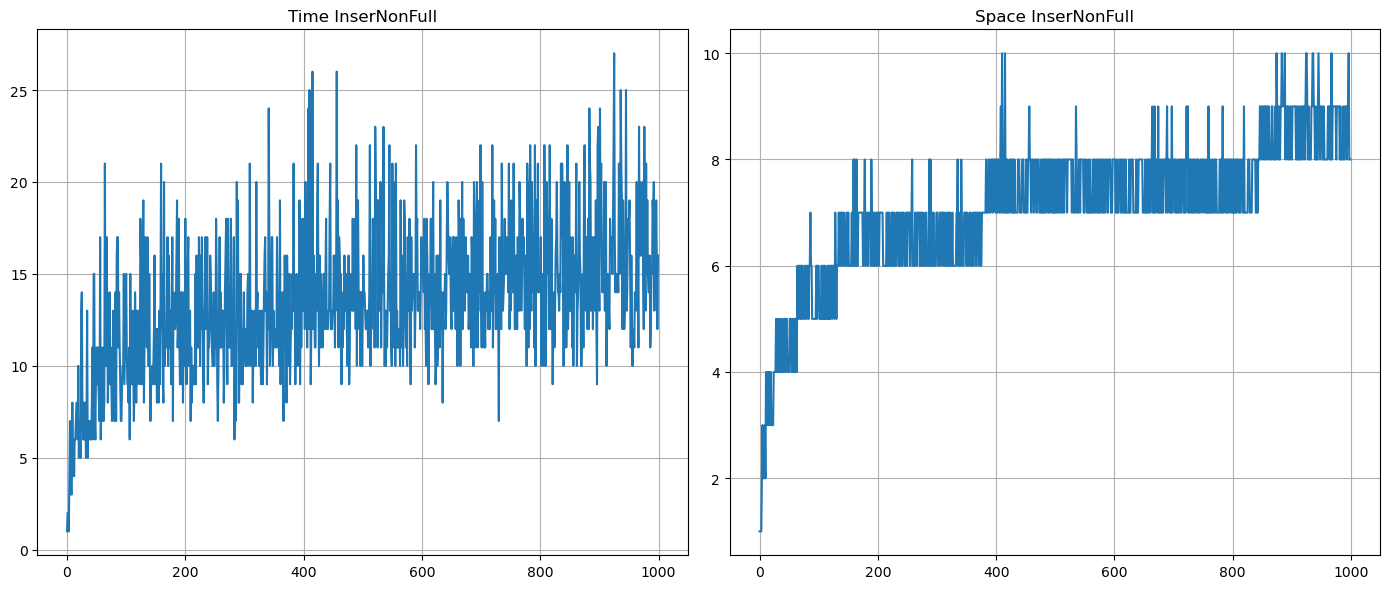

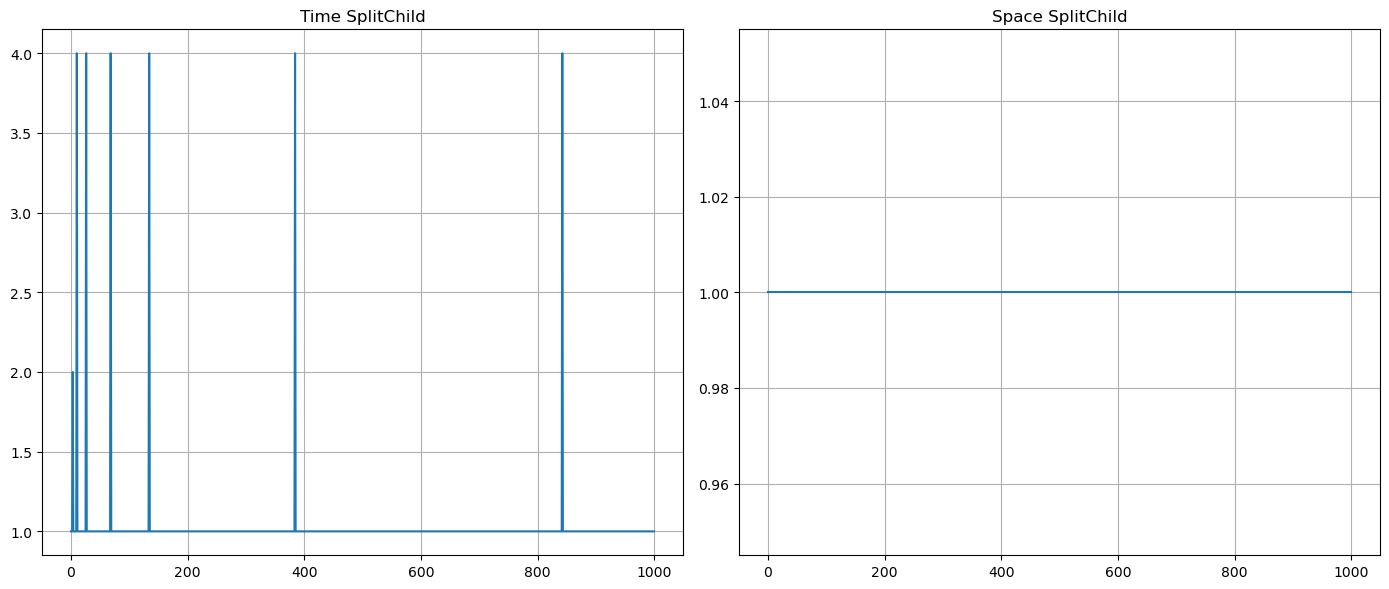

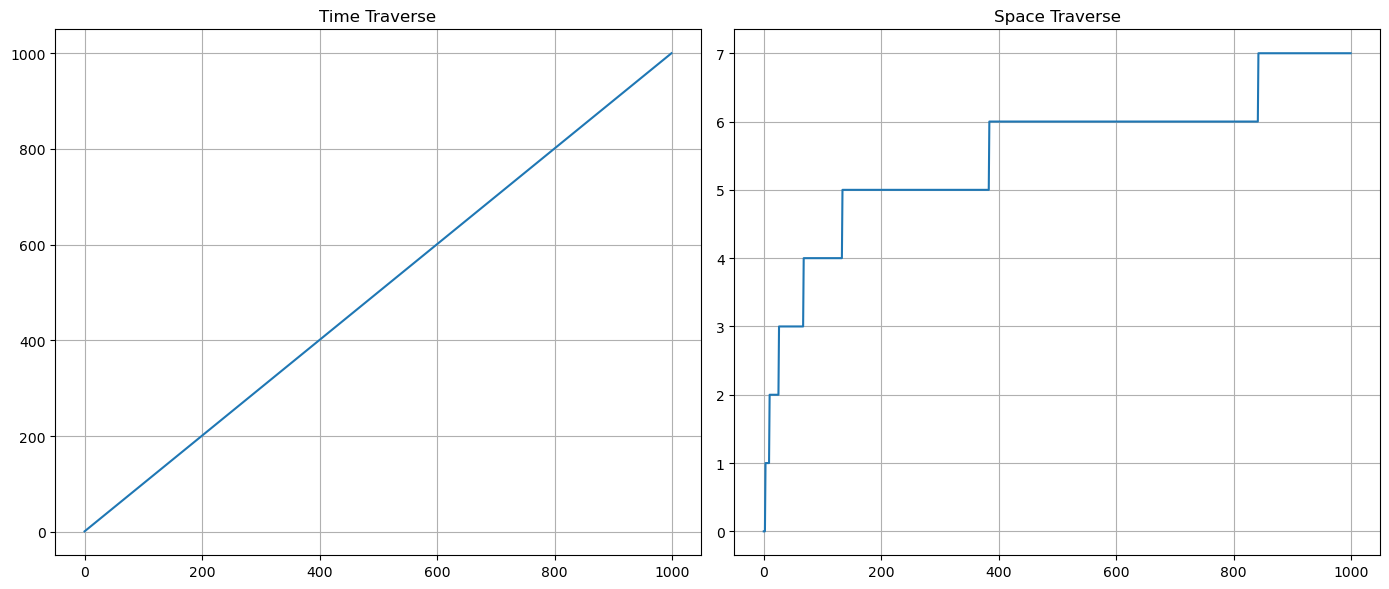

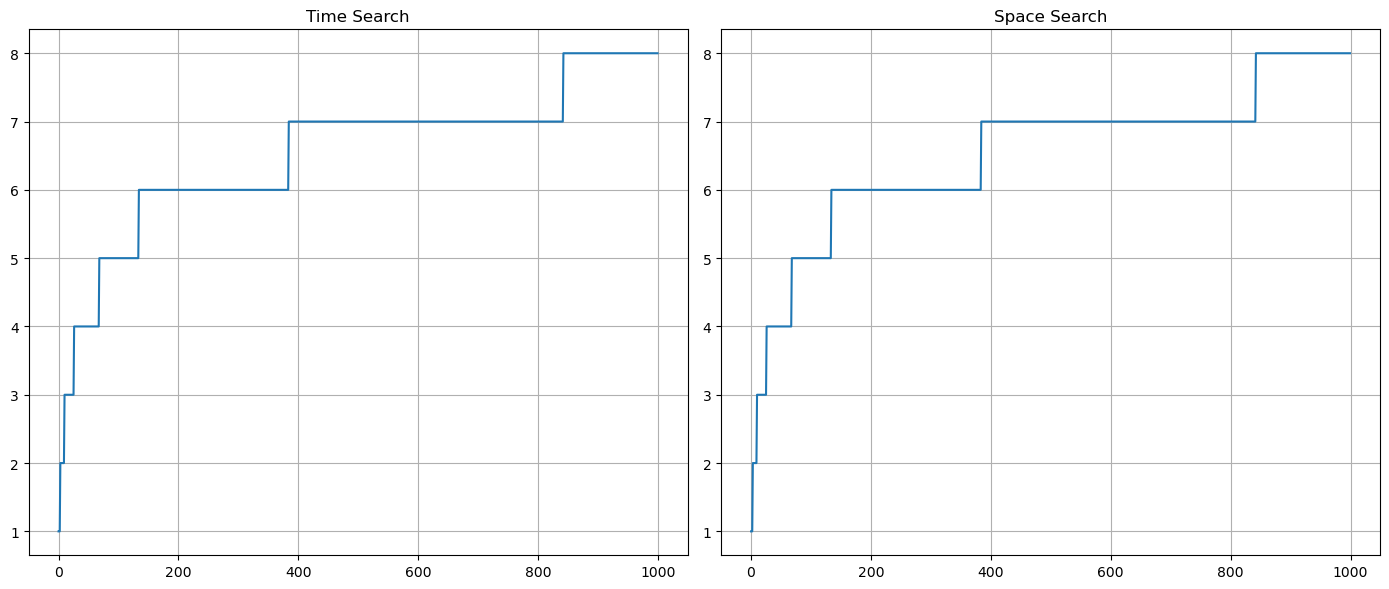

In [22]:
LENGTH_STR = 5
D = 2

N = 1000
R_MIN = 100
R_MAX = 1000000

values = random.sample(range(R_MIN, R_MAX + 1), N)

yt_insert = []
ys_insert = []

yt_split = []
ys_split = []

yt_traverse = []
ys_traverse = []

yt_search = []
ys_search = []

x = list(range(N))

time_t = 0
space_t = 0

for i in range(1, N + 1):
    A = BTree(D)
    
    time, space = 0, 0
    j = 0
    while j < i:
        time, space, time_split, space_split = A.insert(Data(values[j], randstring(LENGTH_STR)))
        j += 1
    
    yt_insert.append(time)
    ys_insert.append(space)

    yt_split.append(time_split)
    ys_split.append(space_split)

    time, space = A.traverse()

    yt_traverse.append(time)
    ys_traverse.append(space)

    k = i + 1
    _, time, space = A.search(k)

    yt_search.append(time)
    ys_search.append(space)

titles = ["Time InserNonFull", "Space InserNonFull", "Time SplitChild", "Space SplitChild", "Time Traverse", "Space Traverse", "Time Search", "Space Search"]
y = [yt_insert, ys_insert, yt_split, ys_split, yt_traverse, ys_traverse, yt_search, ys_search]

for i in range(0, len(titles), 2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    axes[0].set_title(titles[i])
    axes[0].plot(x, y[i])
    axes[0].grid(1)
    axes[1].set_title(titles[i + 1])
    axes[1].plot(x, y[i + 1])
    axes[1].grid(1)
    plt.tight_layout()
    plt.show()